# Scree Plots of Different Datasets

In [1]:
import os
import sys
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import numpy
import pickle
from scipy.sparse import issparse, csr_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Tabula Sapiens

In [2]:
# Collect the data
DATAPATH = "/nfs/turbo/umms-indikar/shared/projects/DGC/data/tabula_sapiens/extract/"
EMBPATH  = "/nfs/turbo/umms-indikar/shared/projects/foundation_models/experiments/tabulaSapiens"

h5ad_files = []
for root, dirs, files in os.walk(DATAPATH):
    for file in files:
        if file.endswith('.h5ad'):
            h5ad_files.append(os.path.join(root, file))

tsCategories = []
for file in h5ad_files:
    tsCategories.append(file.split('.')[0].split('/')[-1])
tsCategories.remove('TabulaSapiens')
print(tsCategories)
models = ['raw', 'geneformer', 'Tgpt', 'scgpt']
print(models)

result = {
    'file': [],
    'data': [],
    'model': [],
    'numCells': [],
    'dimension': [],
    'sigmas': []
}
for category in tsCategories:
    for model in models:
        output_file = f'/nfs/turbo/umms-indikar/shared/projects/foundation_models/experiments/tabulaSapiens/results/result_{category}_{model}.pkl'        
        if os.path.exists(output_file):
            with open(output_file, 'rb') as file:
                single_results = pickle.load(file)
                result['file'].append(output_file)
                result['data'].append(single_results['data'])
                result['model'].append(single_results['model'])
                result['numCells'].append(single_results['numCells'])
                result['dimension'].append(single_results['dimension'])
                if single_results['sigmas'] is not None:
                    result['sigmas'].append(np.sort(single_results['sigmas'])[::-1])
                else:
                    result['sigmas'].append(None)
        else:
            # File does not exist, append None values
            result['file'].append(None)
            result['data'].append(category)
            result['model'].append(model)
            result['numCells'].append(None)
            result['dimension'].append(None)
            result['sigmas'].append(None)

df = pd.DataFrame(result)
df

['TS_germ line', 'TS_stromal', 'TS_Large_Intestine', 'TS_Lymph_Node', 'TS_Skin', 'TS_epithelial', 'TS_Spleen', 'TS_Vasculature', 'TS_Kidney', 'TS_Salivary_Gland', 'TS_Thymus', 'TS_Pancreas', 'TS_Fat', 'TS_Bladder', 'TS_endothelial', 'TS_Blood', 'TS_Trachea', 'TS_Bone_Marrow', 'TS_Tongue', 'TS_Lung', 'TS_Liver', 'TS_Small_Intestine', 'TS_immune', 'TS_Uterus', 'TS_Eye', 'TS_Mammary', 'TS_Prostate', 'TS_Heart', 'TS_Muscle']
['raw', 'geneformer', 'Tgpt', 'scgpt']


,file,data,model,numCells,dimension,sigmas
0,None,TS_germ line,raw,NaN,NaN,None
1,None,TS_germ line,geneformer,NaN,NaN,None
2,None,TS_germ line,Tgpt,NaN,NaN,None
3,None,TS_germ line,scgpt,NaN,NaN,None
4,/nfs/turbo/umms-indikar/shared/projects/founda...,TS_stromal,raw,82478.0,58870.0,None
...,...,...,...,...,...,...
111,/nfs/turbo/umms-indikar/shared/projects/founda...,TS_Heart,scgpt,11505.0,512.0,"[102.1326, 24.3429, 10.272291, 9.001001, 6.298..."
112,/nfs/turbo/umms-indikar/shared/projects/founda...,TS_Muscle,raw,30746.0,58870.0,"[12043.174, 3929.7542, 2788.8562, 2187.3176, 2..."
113,/nfs/turbo/umms-indikar/shared/projects/founda...,TS_Muscle,geneformer,30746.0,512.0,"[2352.0562, 660.7629, 193.3488, 154.38156, 150..."
114,/nfs/turbo/umms-indikar/shared/projects/founda...,TS_Muscle,Tgpt,30746.0,1024.0,"[874.7479394410863, 2.6449773579307213e-05, 1...."


## Visualize by Foundation Model

In [7]:
# Define a list of colors or use a colormap
colors = plt.cm.get_cmap('tab10', len(models))  # Using 'tab10' colormap with number of models as number of colors

# Create a dictionary to map each model to a color
model_colors = {model: colors(i) for i, model in enumerate(models)}

/tmp/ipykernel_3123790/3784897392.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(models))  # Using 'tab10' colormap with number of models as number of colors


/tmp/ipykernel_3123790/3064430752.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = plt.gca().get_legend().legendHandles, [text.get_text() for text in plt.gca().get_legend().texts]


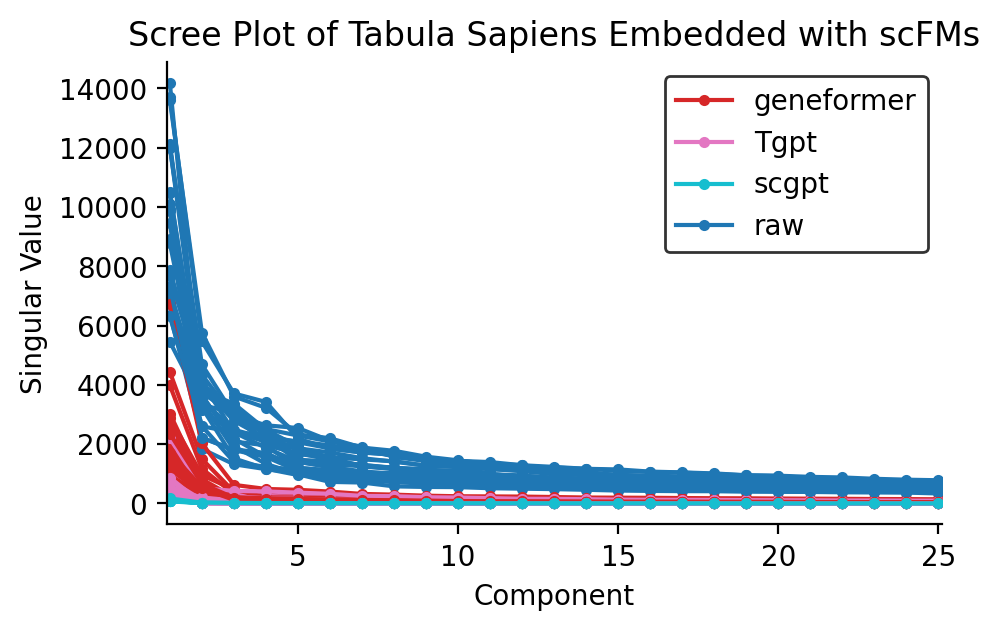

In [9]:
maxNumSvs = 25
plt.figure(figsize=(5,3), dpi=200)
for i in range(df.shape[0]):
    sigmas = df['sigmas'].iloc[i]
    model = df['model'].iloc[i]
    if sigmas is None:
        continue
    color = model_colors[model]
    if len(sigmas) > maxNumSvs:
        sigmas = sigmas[:maxNumSvs]
    plt.plot(np.arange(1, 1+len(sigmas)), sigmas, '.-', color=color, label=model)  # Add color and model label

# Customize plot settings
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.title('Scree Plot of Tabula Sapiens Embedded with scFMs')
plt.legend()
handles, labels = plt.gca().get_legend().legendHandles, [text.get_text() for text in plt.gca().get_legend().texts]
new_labels = {}
for handle, label in zip(handles, labels):
    if label not in new_labels:
        new_labels[label] = handle
plt.legend(new_labels.values(), new_labels.keys(), edgecolor='k')
plt.xlim([0.9, maxNumSvs+0.1])
sns.despine()
plt.show()


/tmp/ipykernel_3123790/3221553137.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = plt.gca().get_legend().legendHandles, [text.get_text() for text in plt.gca().get_legend().texts]


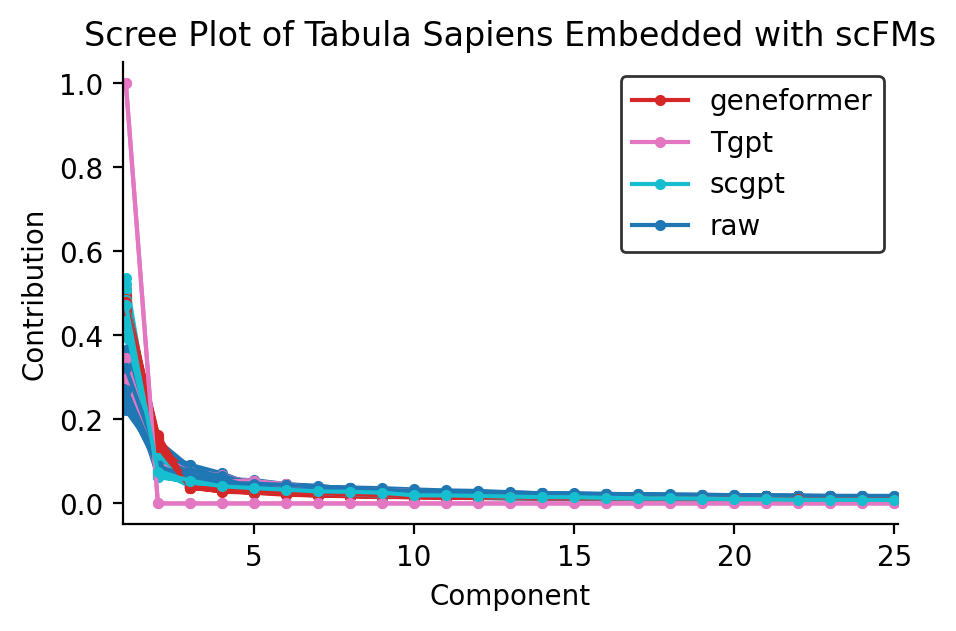

In [20]:
maxNumSvs = 25
plt.figure(figsize=(5,3), dpi=200)
for i in range(df.shape[0]):
    sigmas = df['sigmas'].iloc[i]
    model = df['model'].iloc[i]
    if sigmas is None:
        continue
    color = model_colors[model]
    if len(sigmas) > maxNumSvs:
        sigmas = sigmas[:maxNumSvs]
    sigmas = sigmas / sum(sigmas)
    plt.plot(np.arange(1, 1+len(sigmas)), sigmas, '.-', color=color, label=model)  # Add color and model label

# Customize plot settings
plt.xlabel('Component')
plt.ylabel('Contribution')
plt.title('Scree Plot of Tabula Sapiens Embedded with scFMs')
plt.legend()
handles, labels = plt.gca().get_legend().legendHandles, [text.get_text() for text in plt.gca().get_legend().texts]
new_labels = {}
for handle, label in zip(handles, labels):
    if label not in new_labels:
        new_labels[label] = handle
plt.legend(new_labels.values(), new_labels.keys(), edgecolor='k')
plt.xlim([0.9, maxNumSvs+0.1])
sns.despine()
plt.show()


/tmp/ipykernel_3123790/3093174900.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = plt.gca().get_legend().legendHandles, [text.get_text() for text in plt.gca().get_legend().texts]


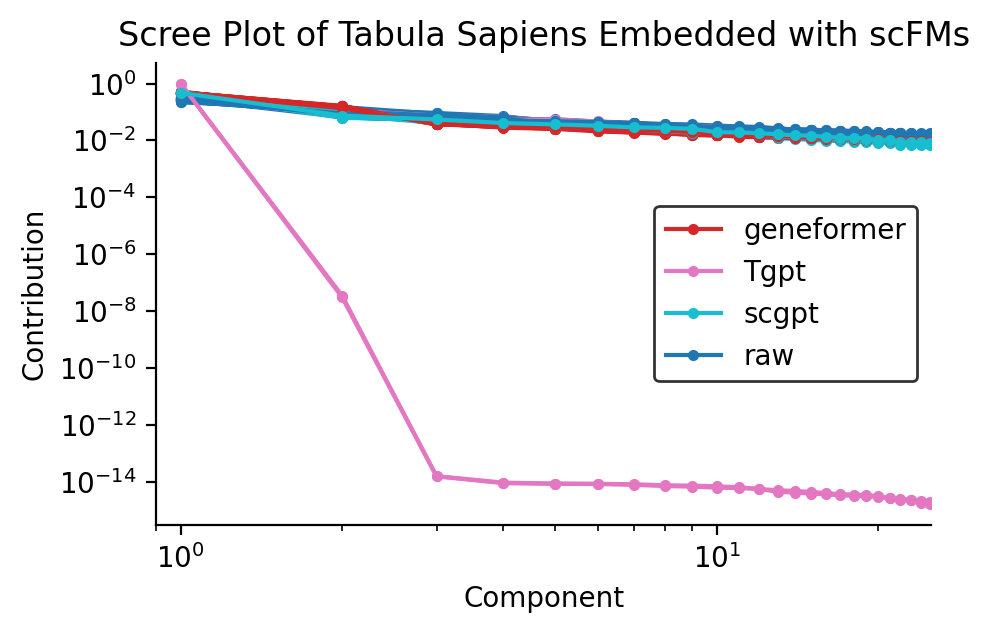

In [23]:
maxNumSvs = 25
plt.figure(figsize=(5,3), dpi=200)
for i in range(df.shape[0]):
    sigmas = df['sigmas'].iloc[i]
    model = df['model'].iloc[i]
    if sigmas is None:
        continue
    color = model_colors[model]
    if len(sigmas) > maxNumSvs:
        sigmas = sigmas[:maxNumSvs]
    sigmas = sigmas / sum(sigmas)
    plt.plot(np.arange(1, 1+len(sigmas)), sigmas, '.-', color=color, label=model)  # Add color and model label

# Customize plot settings
plt.xlabel('Component')
plt.ylabel('Contribution')
plt.title('Scree Plot of Tabula Sapiens Embedded with scFMs')
plt.legend()
handles, labels = plt.gca().get_legend().legendHandles, [text.get_text() for text in plt.gca().get_legend().texts]
new_labels = {}
for handle, label in zip(handles, labels):
    if label not in new_labels:
        new_labels[label] = handle
plt.legend(new_labels.values(), new_labels.keys(), edgecolor='k')
plt.xlim([0.9, maxNumSvs+0.1])
sns.despine()
plt.xscale('log')
plt.yscale('log')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_3123790/2781691099.py:21: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = plt.gca().get_legend().legendHandles, [text.get_text() for text in plt.gca().get_legend().texts]


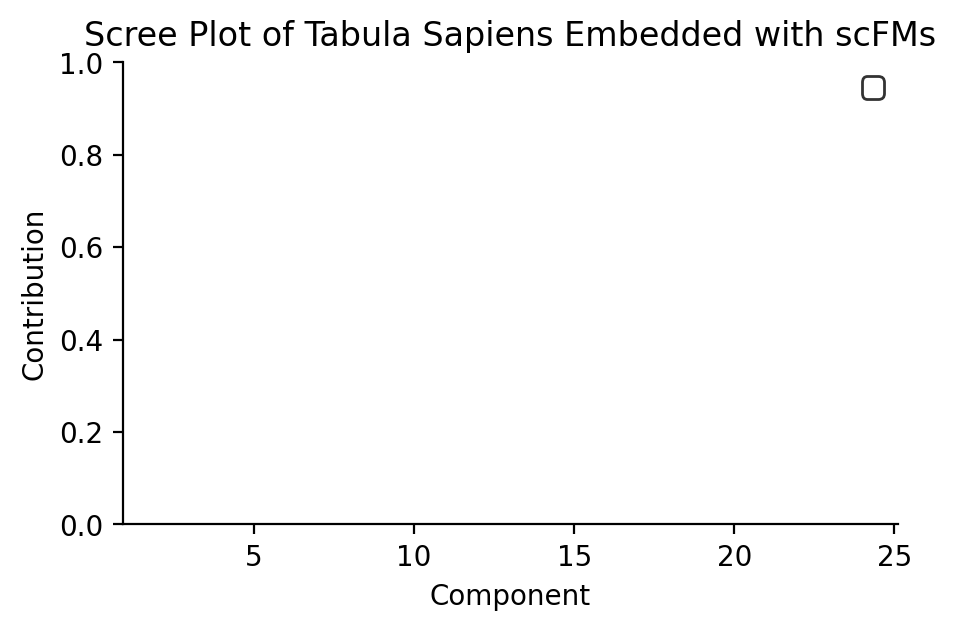

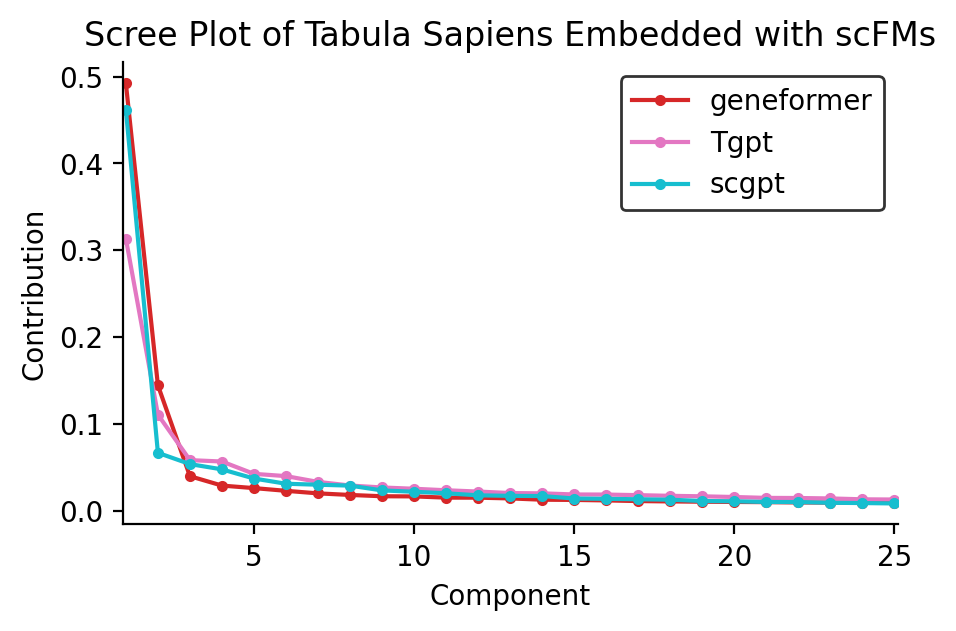

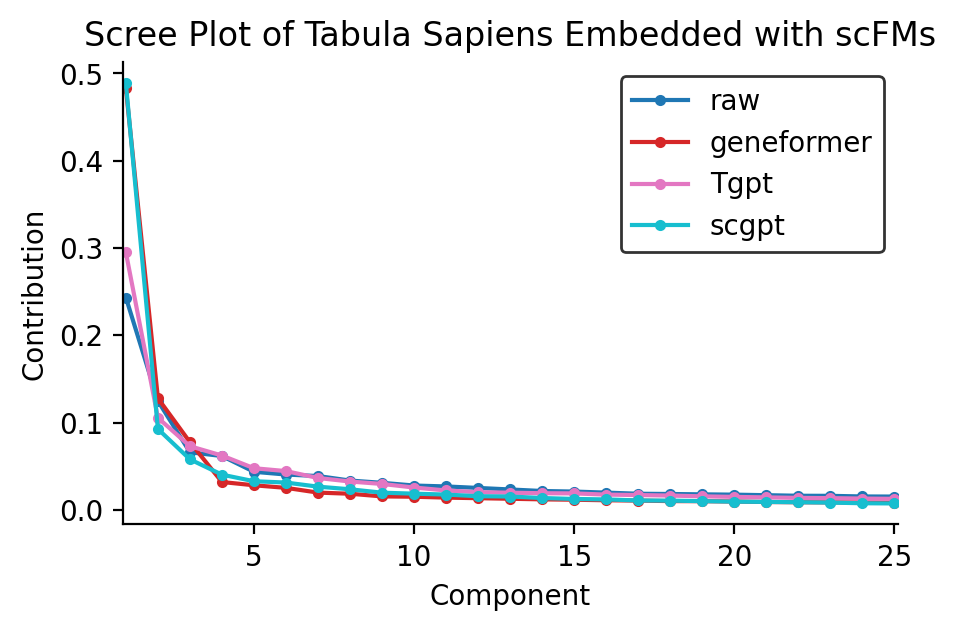

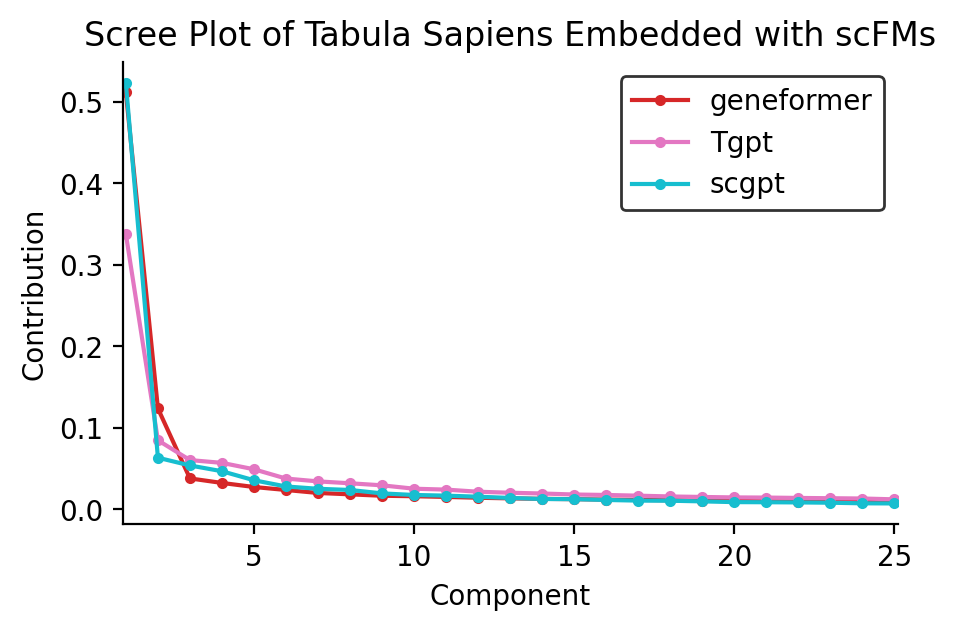

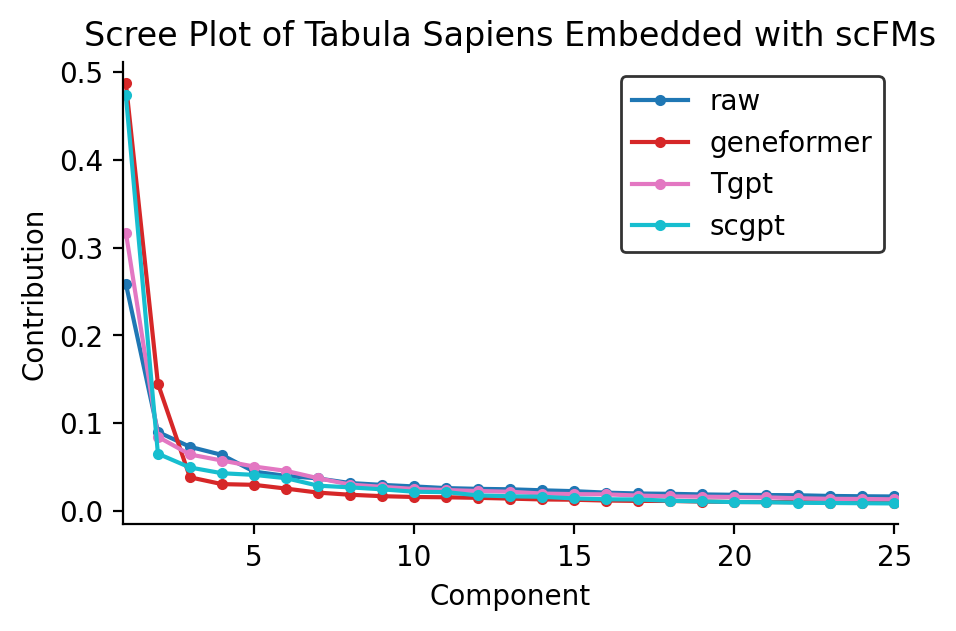

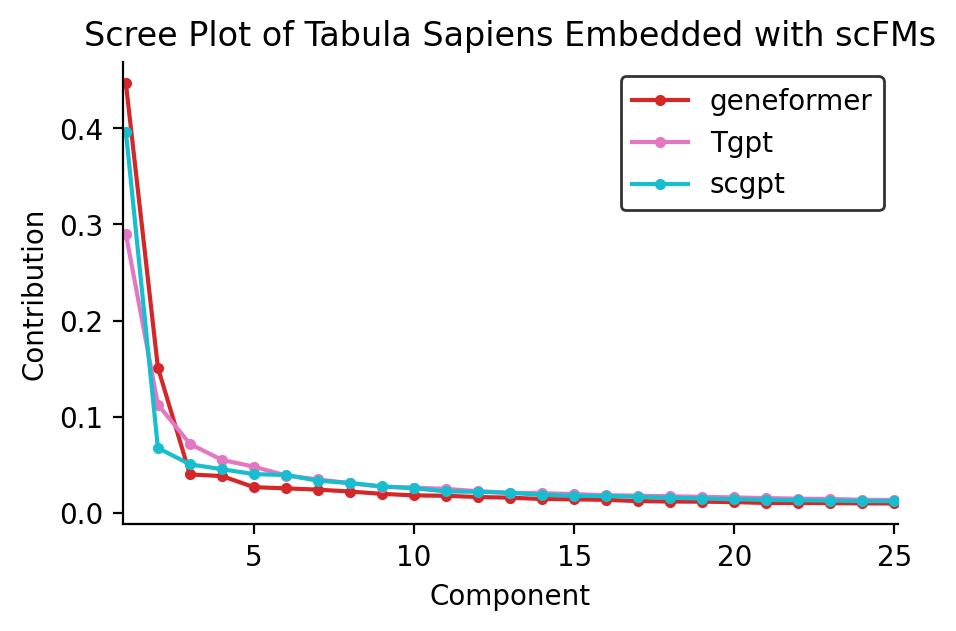

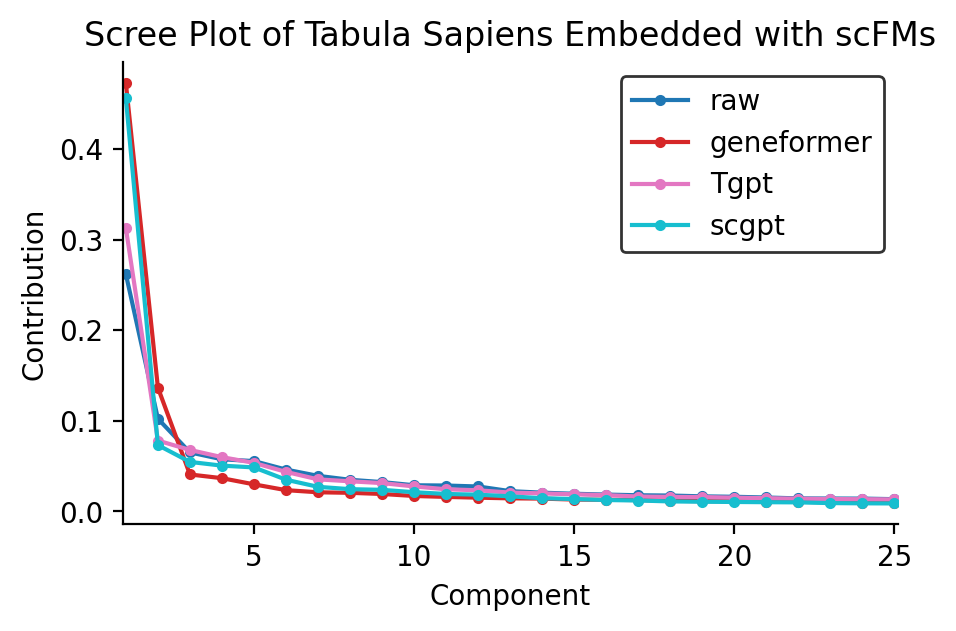

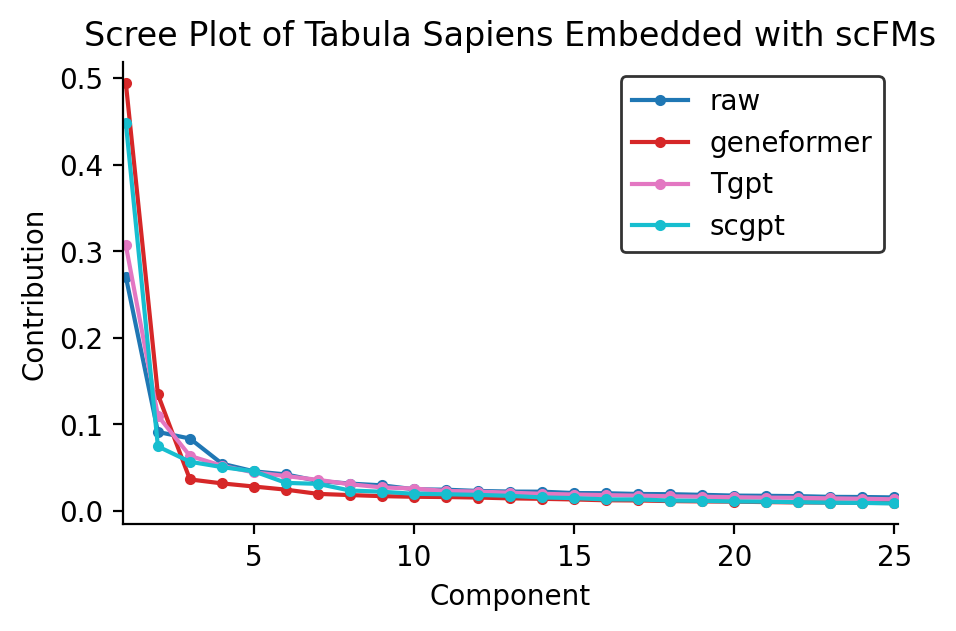

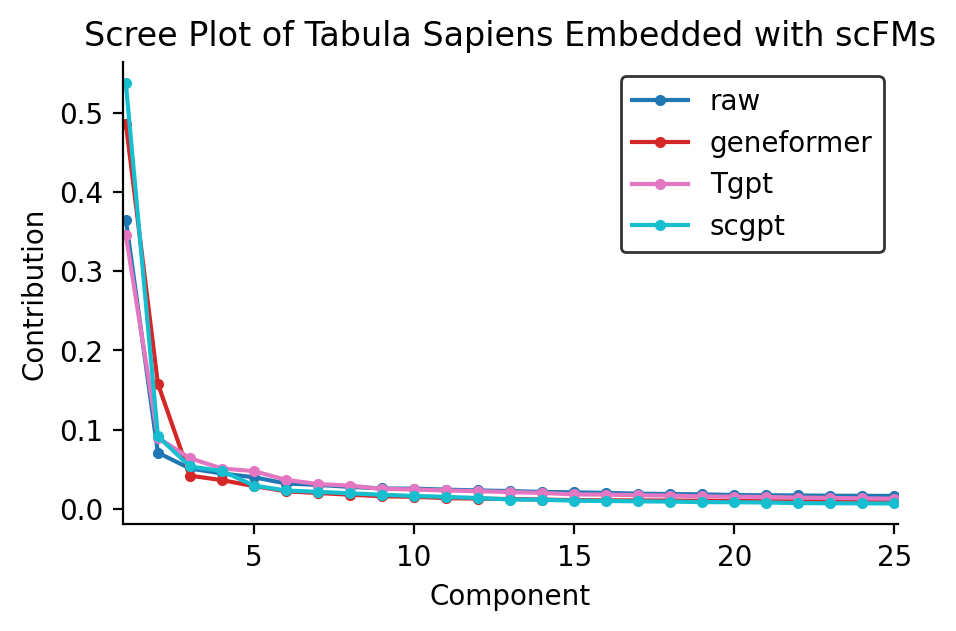

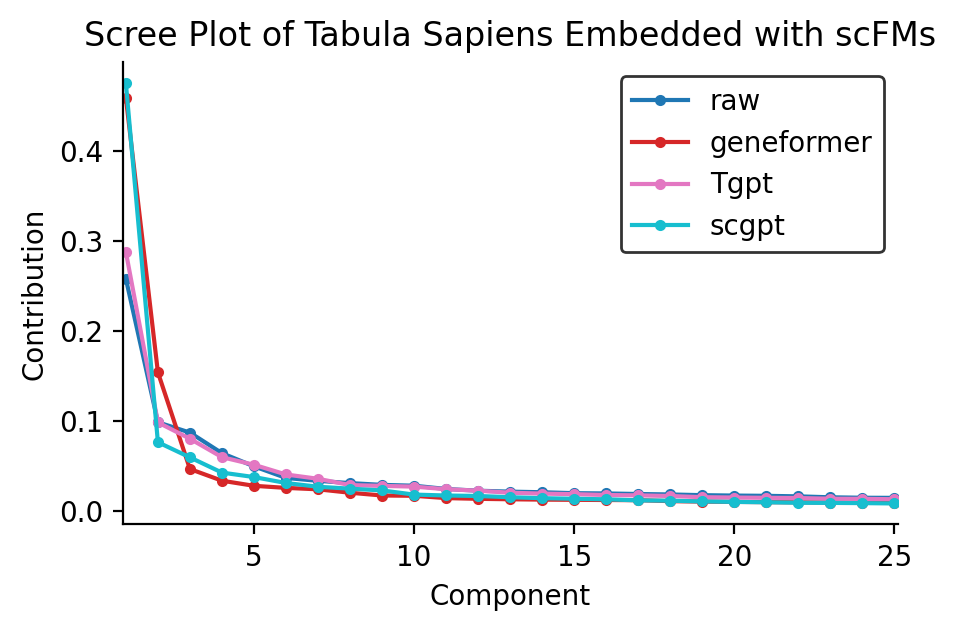

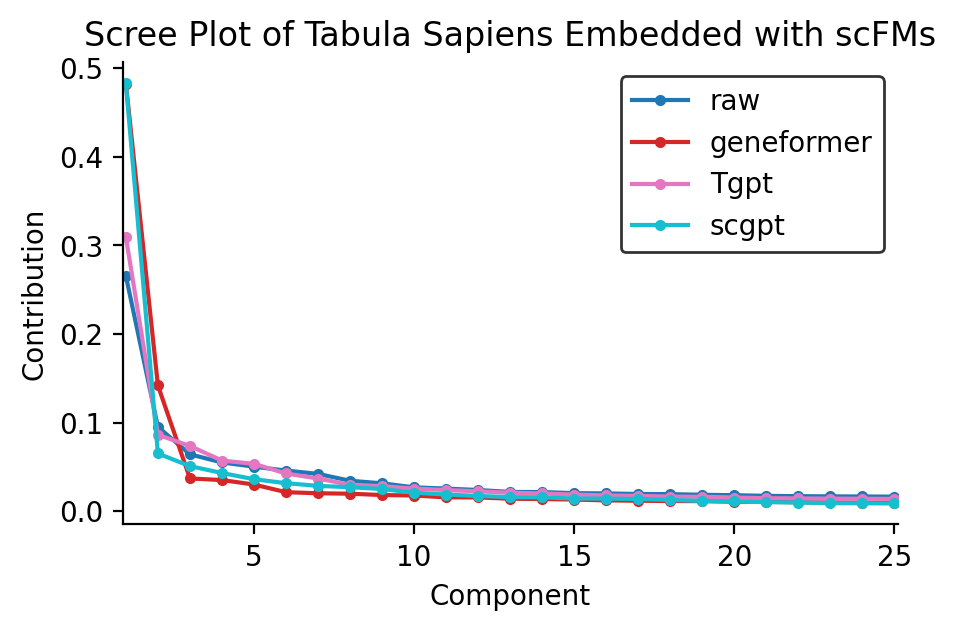

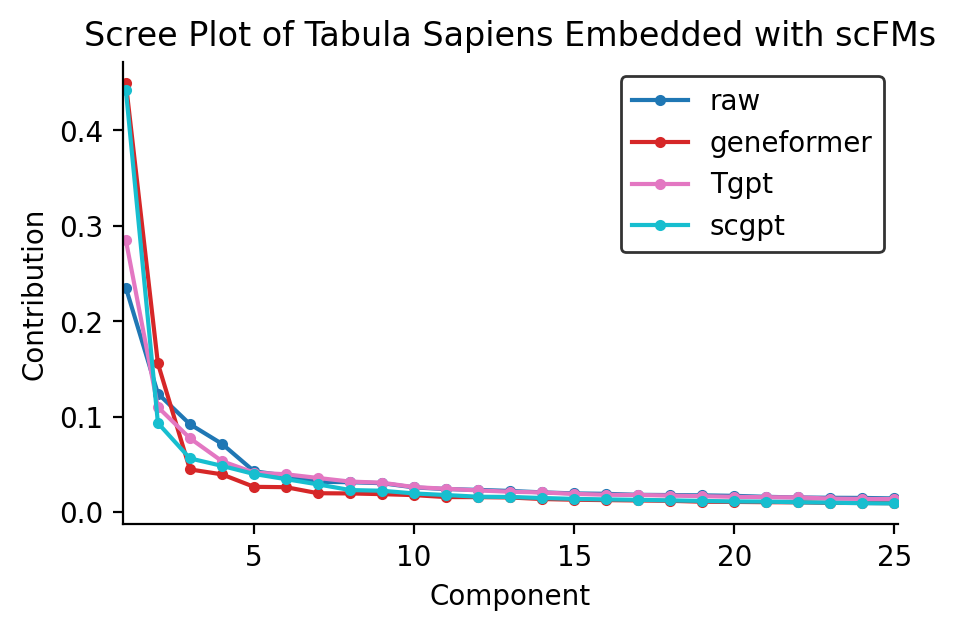

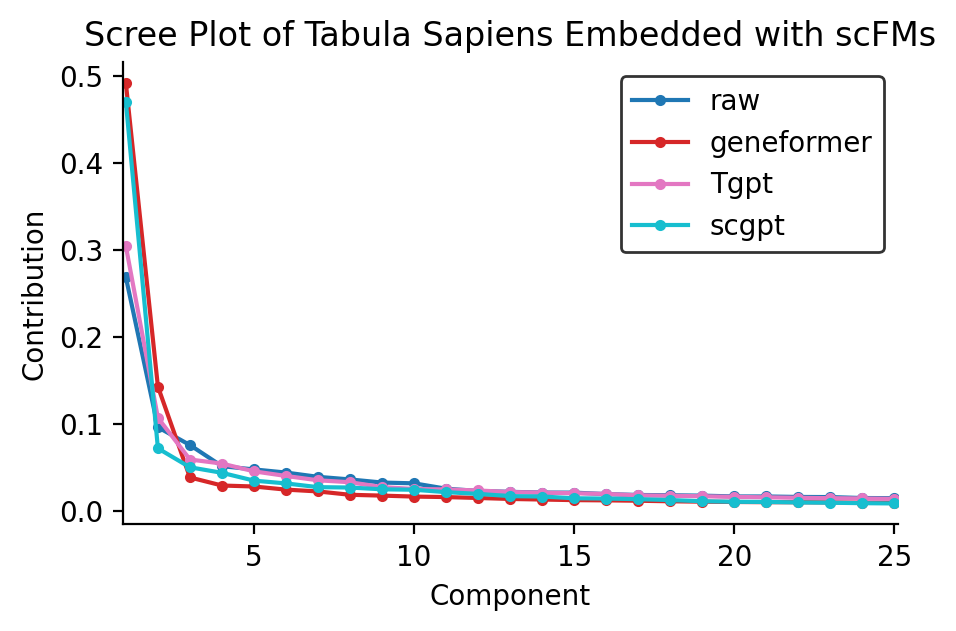

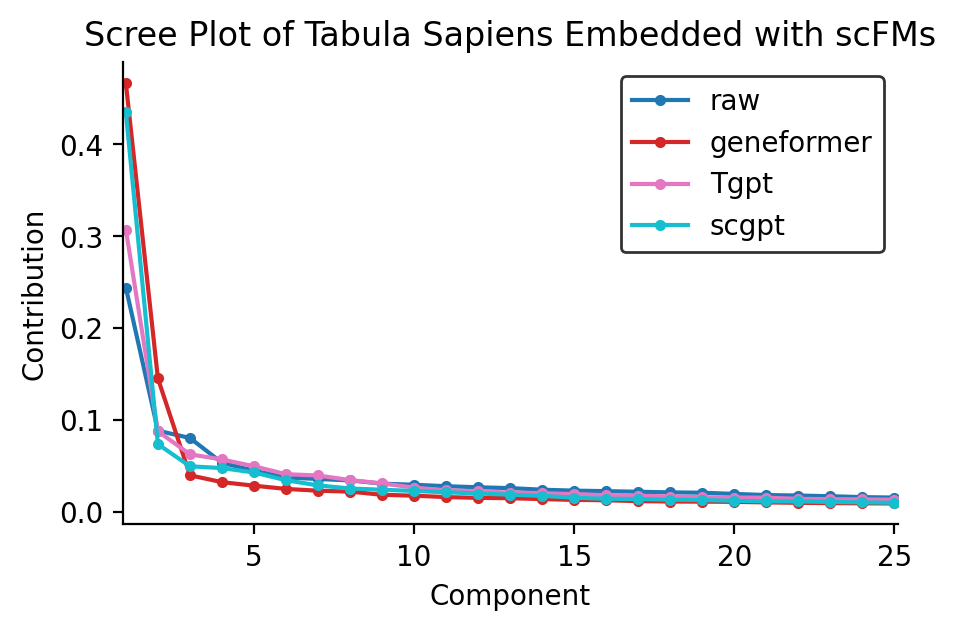

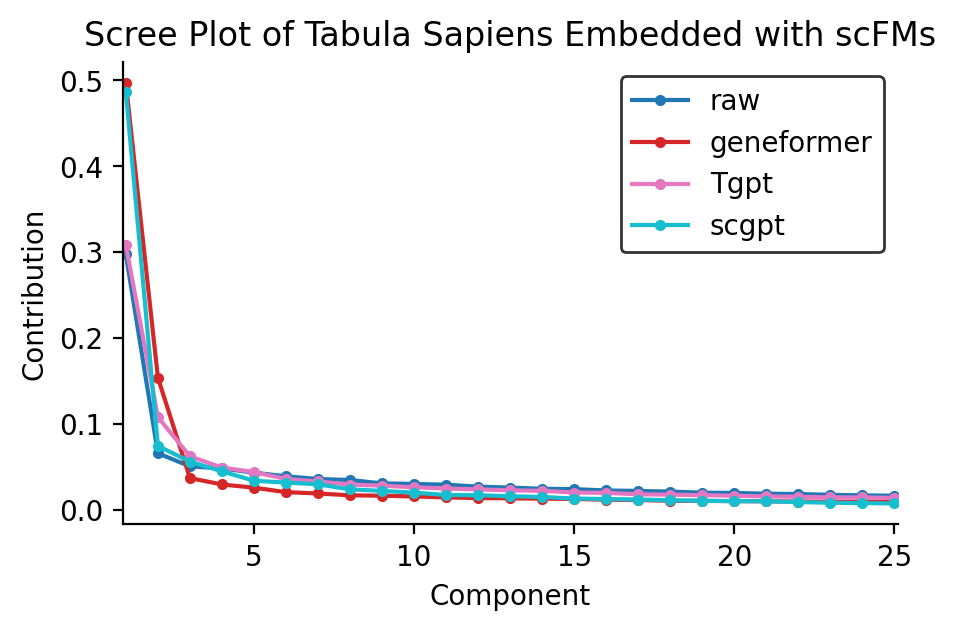

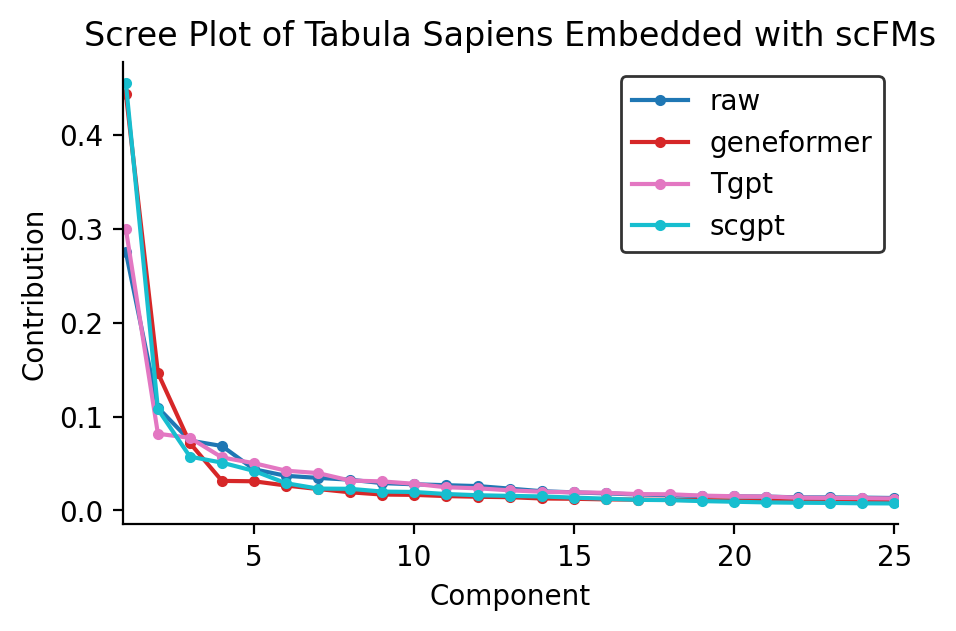

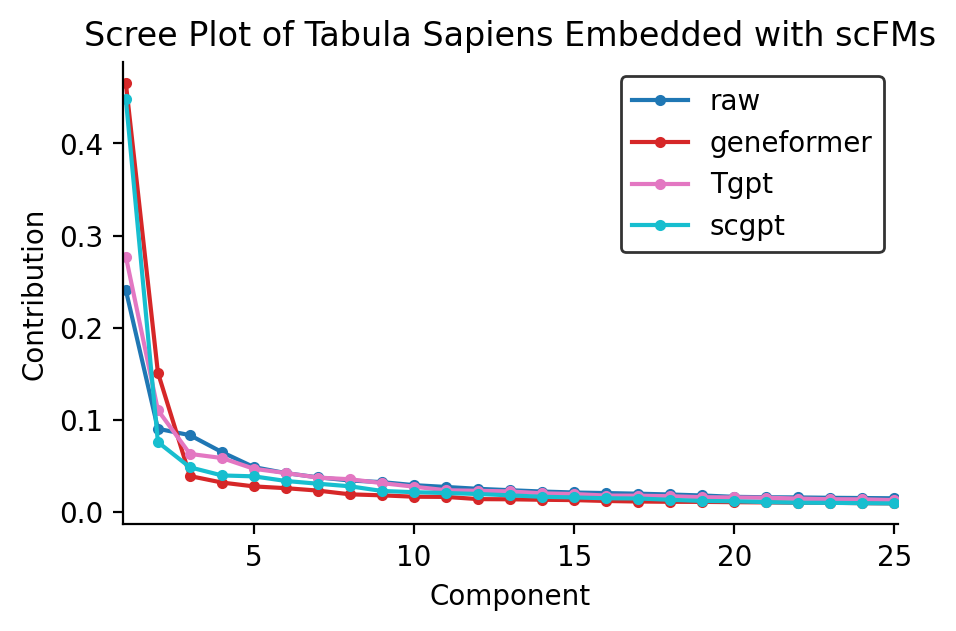

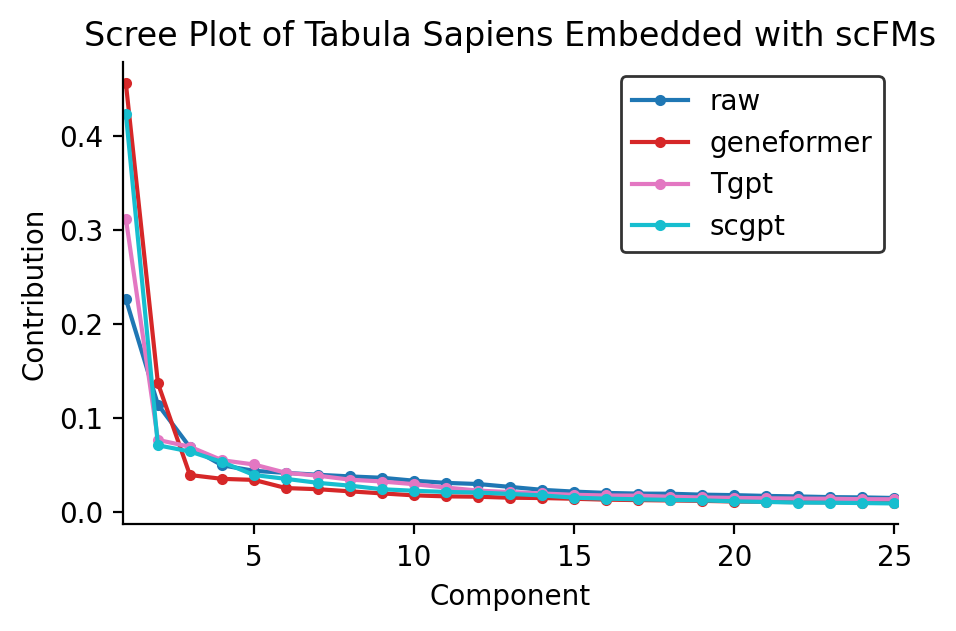

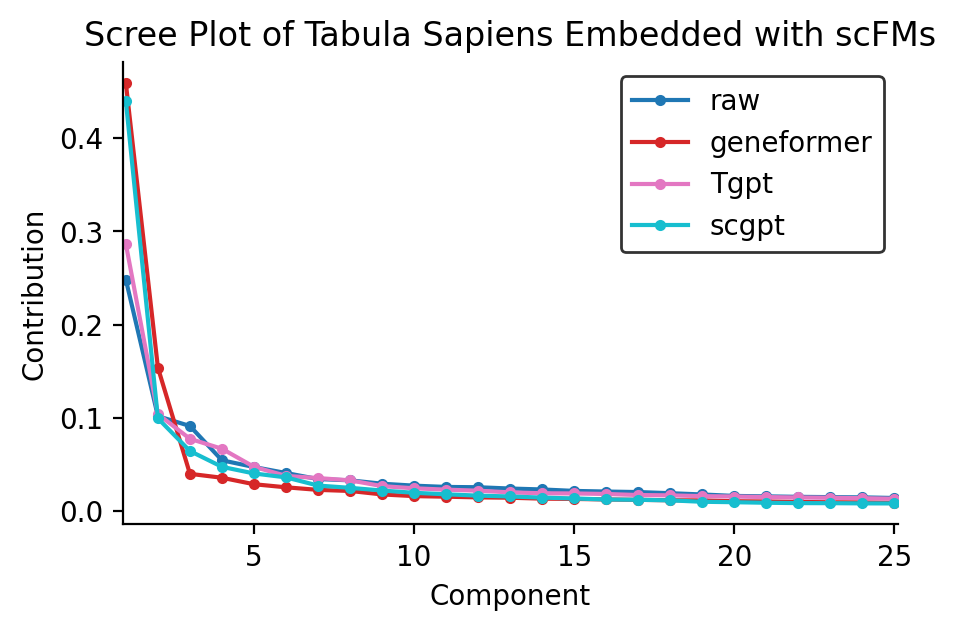

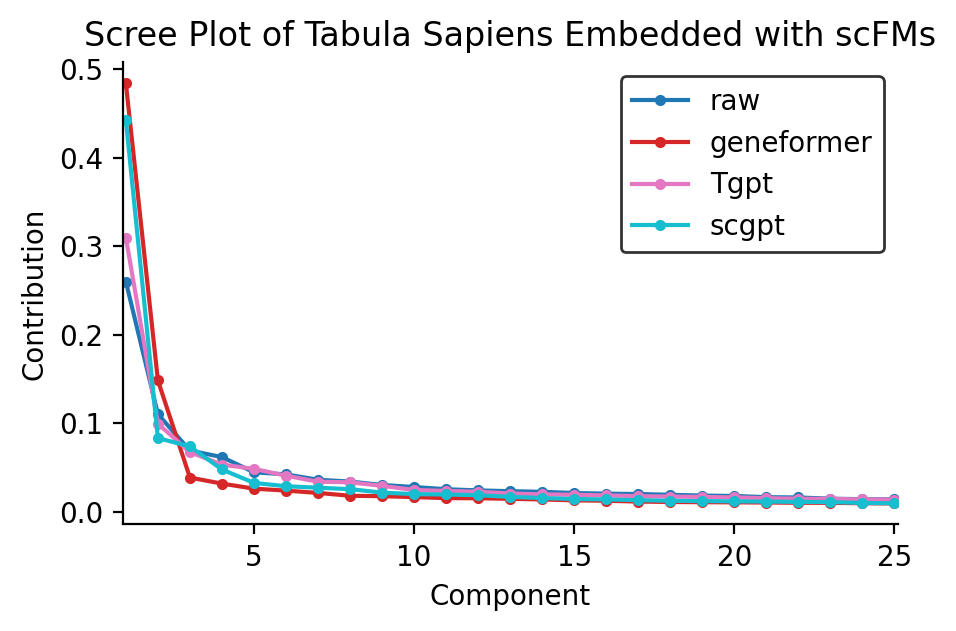

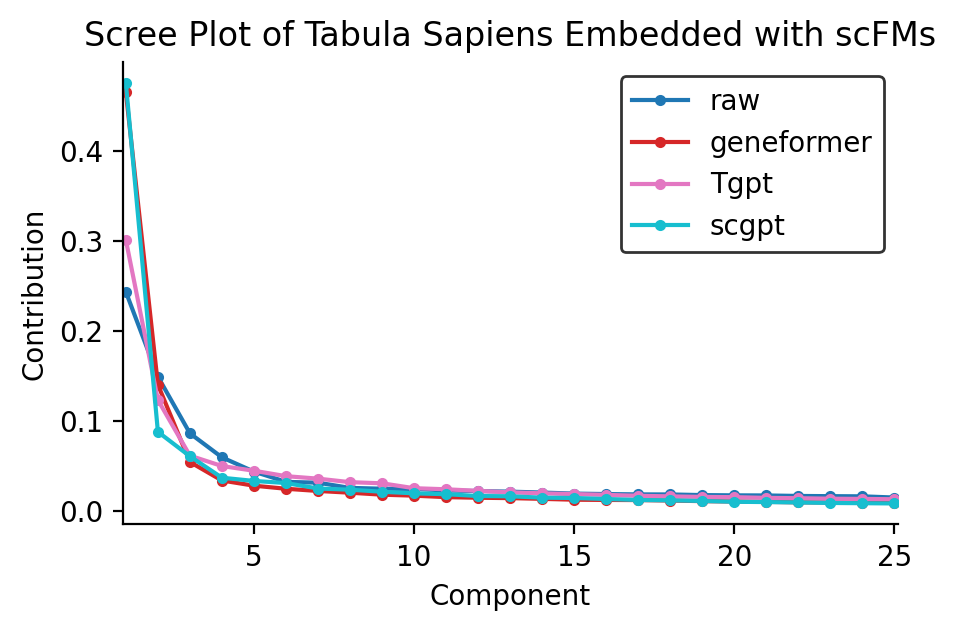

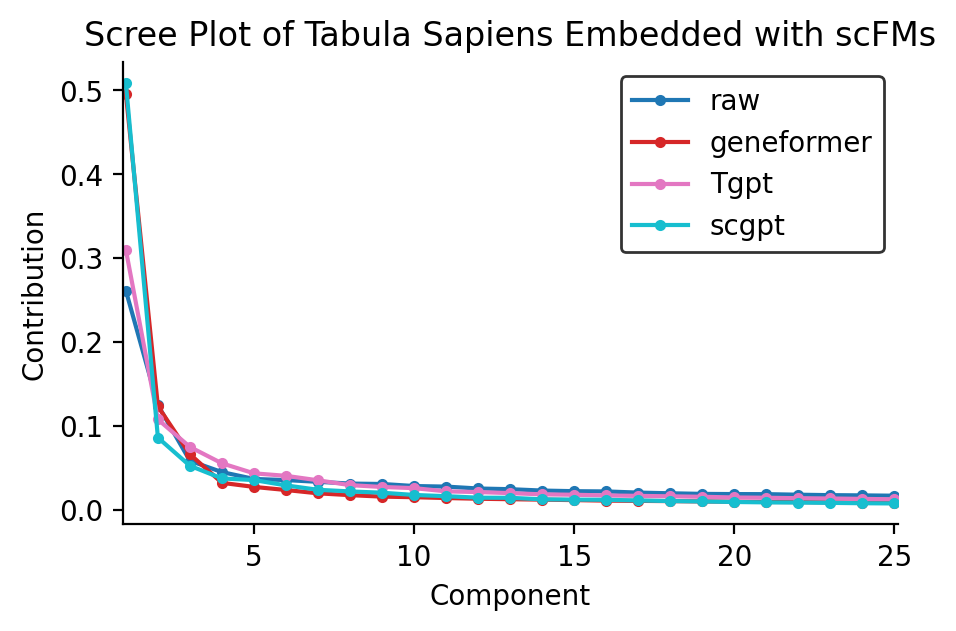

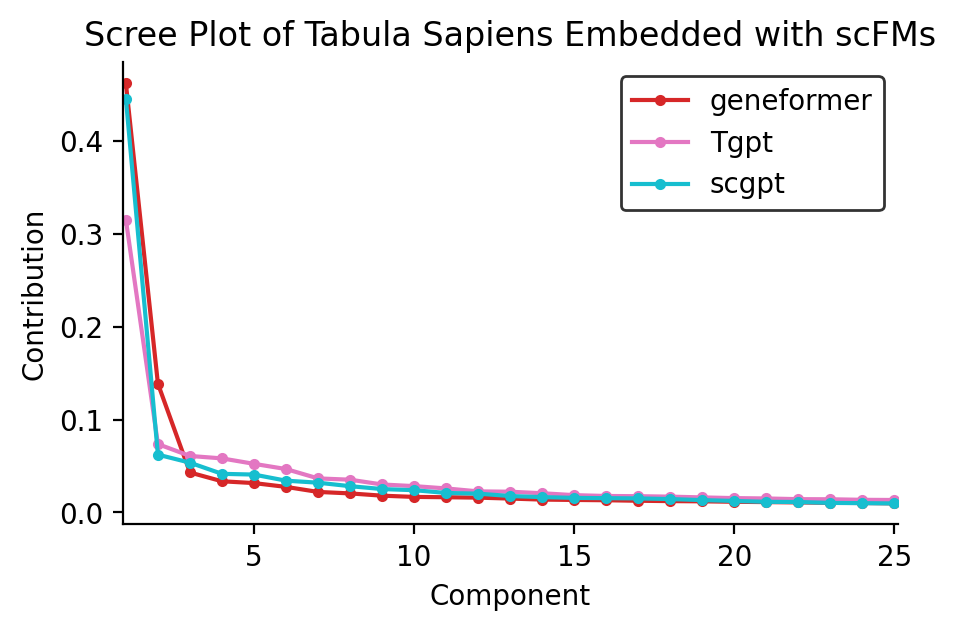

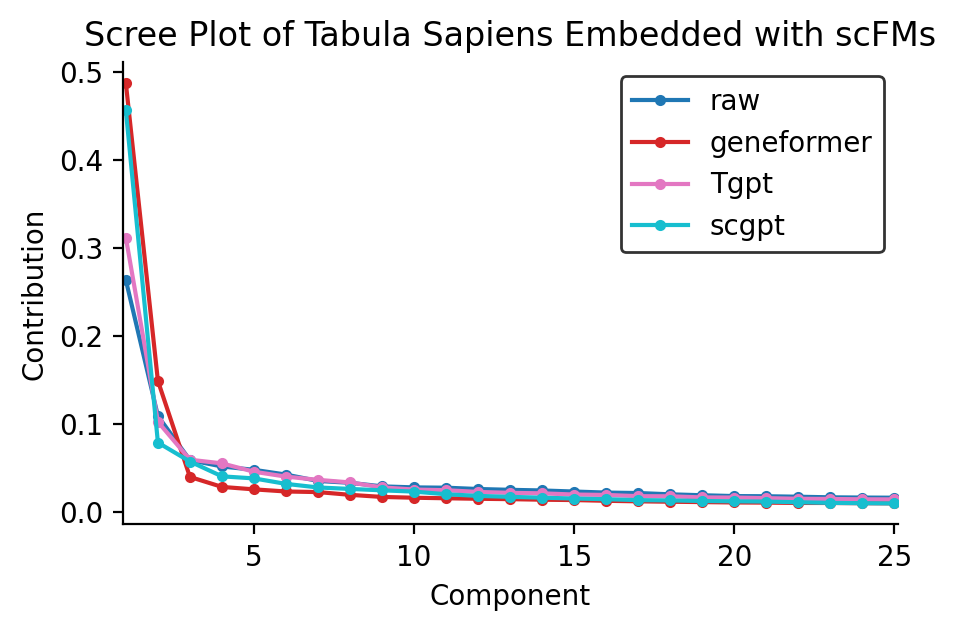

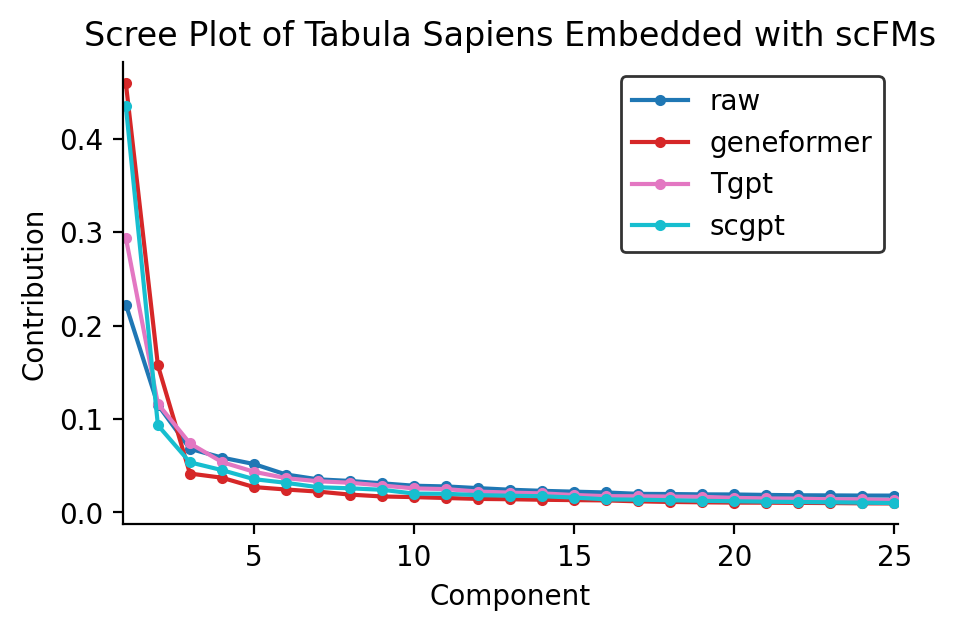

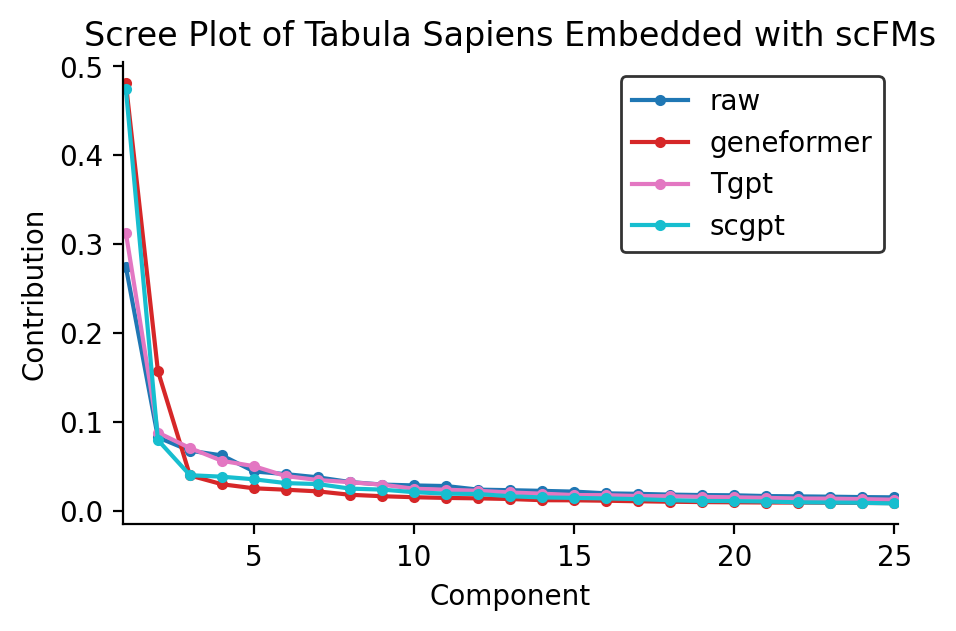

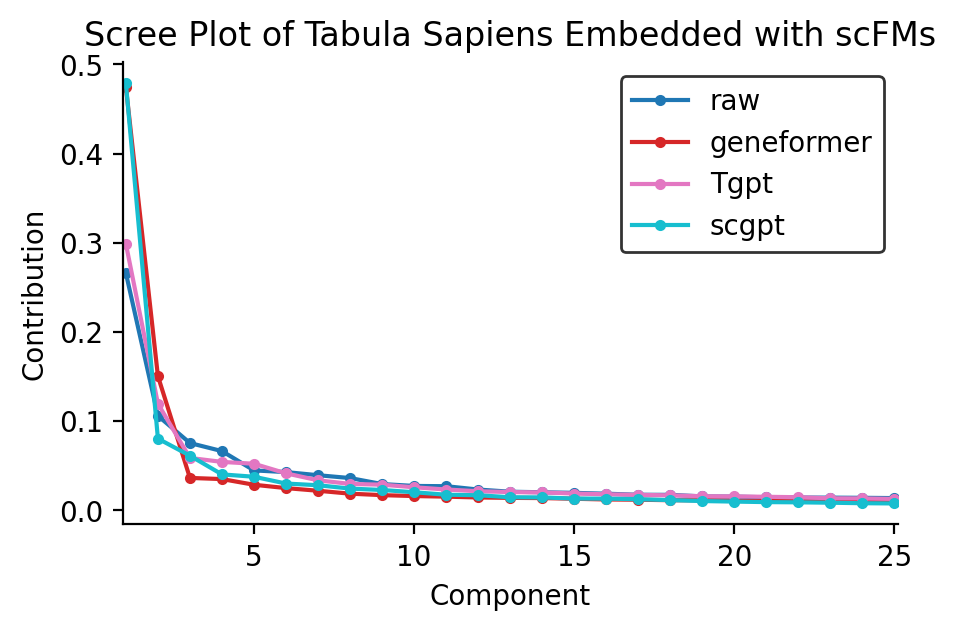

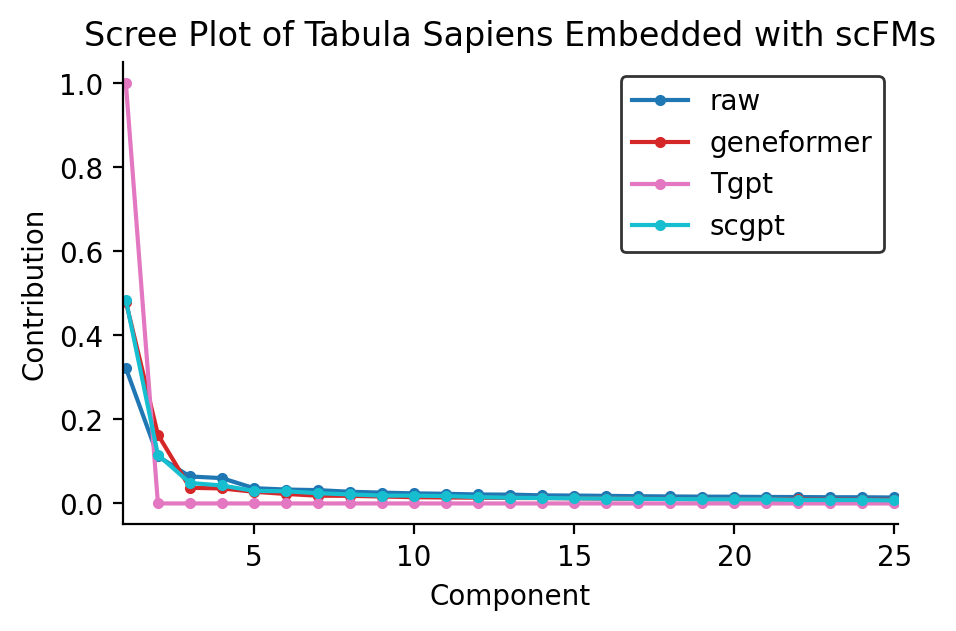

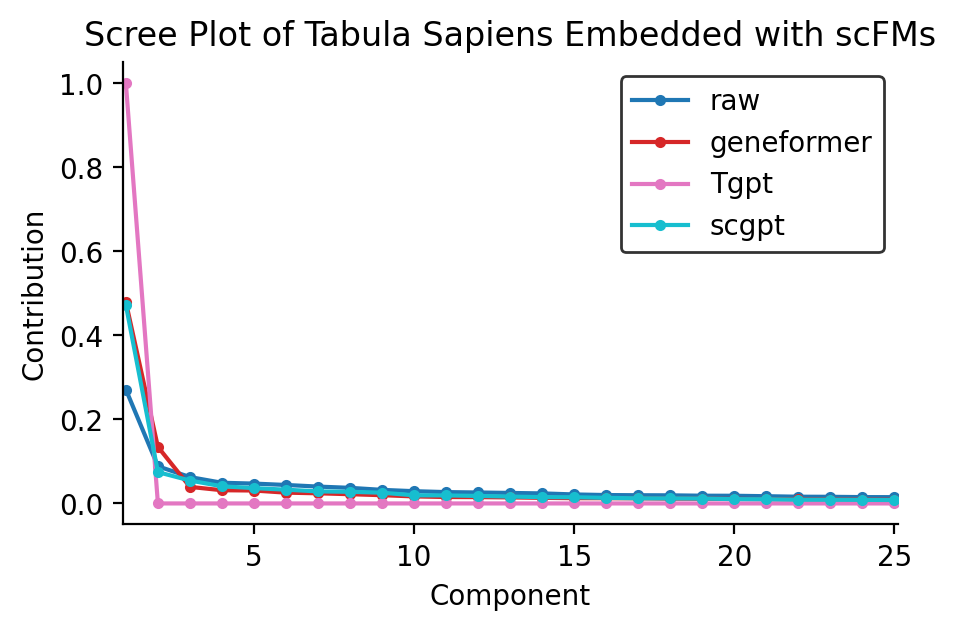

In [19]:
for data in df['data'].unique():
    dfd = df[df['data'] == data]
    maxNumSvs = 25
    plt.figure(figsize=(5,3), dpi=200)
    for i in range(dfd.shape[0]):
        sigmas = dfd['sigmas'].iloc[i]
        model = dfd['model'].iloc[i]
        if sigmas is None:
            continue
        color = model_colors[model]
        if len(sigmas) > maxNumSvs:
            sigmas = sigmas[:maxNumSvs]
        sigmas = sigmas / sum(sigmas)
        plt.plot(np.arange(1, 1+len(sigmas)), sigmas, '.-', color=color, label=model)  # Add color and model label
    
    # Customize plot settings
    plt.xlabel('Component')
    plt.ylabel('Contribution')
    plt.title('Scree Plot of Tabula Sapiens Embedded with scFMs')
    plt.legend()
    handles, labels = plt.gca().get_legend().legendHandles, [text.get_text() for text in plt.gca().get_legend().texts]
    new_labels = {}
    for handle, label in zip(handles, labels):
        if label not in new_labels:
            new_labels[label] = handle
    plt.legend(new_labels.values(), new_labels.keys(), edgecolor='k')
    plt.xlim([0.9, maxNumSvs+0.1])
    sns.despine()
    plt.show()


## Visualize by Dataset

In [14]:
# Define a list of colors or use a colormap
colors = plt.cm.get_cmap('tab10', len(tsCategories))  # Using 'tab10' colormap with number of models as number of colors

# Create a dictionary to map each model to a color
data_colors = {cat: colors(i) for i, cat in enumerate(tsCategories)}

/tmp/ipykernel_3123790/3309762920.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(tsCategories))  # Using 'tab10' colormap with number of models as number of colors


/tmp/ipykernel_3123790/3241146415.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = plt.gca().get_legend().legendHandles, [text.get_text() for text in plt.gca().get_legend().texts]


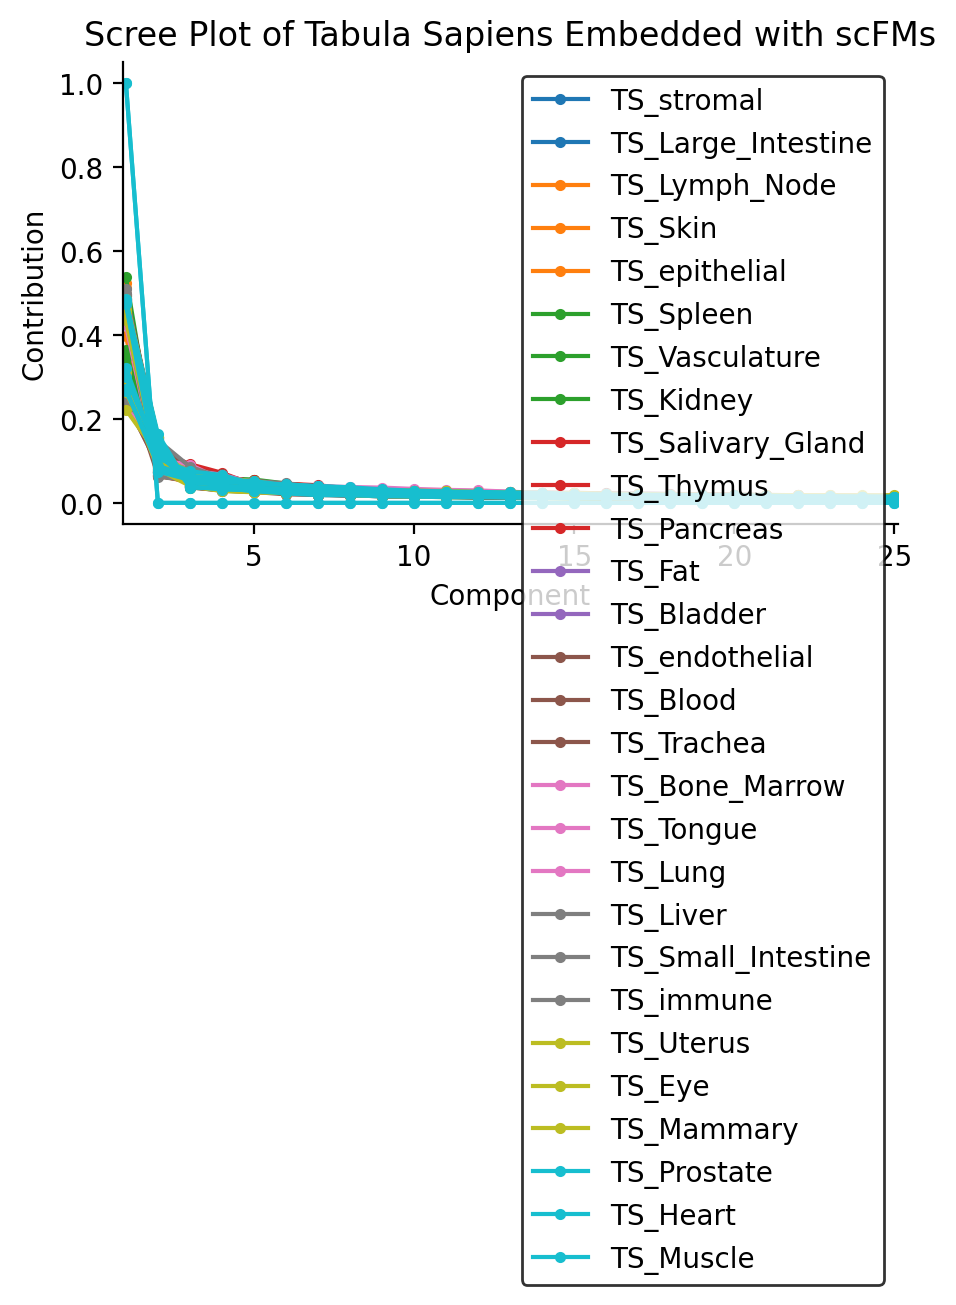

In [16]:
maxNumSvs = 25
plt.figure(figsize=(5,3), dpi=200)
for i in range(df.shape[0]):
    sigmas = df['sigmas'].iloc[i]
    cat = df['data'].iloc[i]
    if sigmas is None:
        continue
    color = data_colors[cat]
    if len(sigmas) > maxNumSvs:
        sigmas = sigmas[:maxNumSvs]
    sigmas = sigmas / sum(sigmas)
    plt.plot(np.arange(1, 1+len(sigmas)), sigmas, '.-', color=color, label=cat)  # Add color and model label

# Customize plot settings
plt.xlabel('Component')
plt.ylabel('Contribution')
plt.title('Scree Plot of Tabula Sapiens Embedded with scFMs')
plt.legend()
handles, labels = plt.gca().get_legend().legendHandles, [text.get_text() for text in plt.gca().get_legend().texts]
new_labels = {}
for handle, label in zip(handles, labels):
    if label not in new_labels:
        new_labels[label] = handle
plt.legend(new_labels.values(), new_labels.keys(), edgecolor='k')
plt.xlim([0.9, maxNumSvs+0.1])
sns.despine()
plt.show()
